% title: Jupyter Notebooks and Python
% author: Jon Wheeler
% date: 2022-03-03

# Jupyter Notebooks & Python

## Abstract

Workshop tutorial with a hands-on demonstration of Markdown, Jupyter Notebooks (Python) and R Markdown (R). 

*keywords*: markdown, jupyter, python, literate computing

## Jupyter Tips

Unlike an R Markdown file, which has to be *knit* in order for Markdown to be rendered, in a Jupyter Notebook we only need to execute a cell of Markdown formatted text. 

When a new cell is created, by default it is a code block for executing Python, R, or any other supported language. The convert cells into Markdown cells, we can

* type ```ESC + m``` OR
* select **Cell->Cell Type->Markdown**.

Once we have coverted the cell to Markdown, we can render it by running or executing the cell. Here again we have mouse/menu and keyboard options. Making sure the cell we want to execute is selected, we can

* hit the **Run** button at the top of the screen OR
* select **Cell->Run Cells** OR
* type ```CTL + Enter``` to run the cell OR
* type ```SHIFT + Enter``` to run the cell and create a new, empty cell.

Double click a Markdown cell to edit it once it has been rendered. Alternatively, with the cell selected hit ```Enter```.

Sometimes we may accidentally hit a keyboard combination that converts a code cell to a Markdown or raw text cell. When this happens, we can use a similar process as above to convert a cell to code:

* type ```ESC + Y``` OR
* select **Cell->Cell Type->Code**.

Code cells are executed using the same commands or keyboard shortcuts as listed above for rendering Markdown.

First, let's demonstrate some Python, along with some things to be aware of when using interactive notebooks.

In [3]:
# Use comments to add text or descriptive info to a code cell.

196 * 786527
261876 / 19871987
3**88

969773729787523602876821942164080815560161

In [4]:
print(196 * 786527)
print(261876 / 19871987)
print(3**88)

154159292
0.013178148717589237
969773729787523602876821942164080815560161


### Exercise

Compare the output of the previous two cells. Why are they different? What is happening in the first cell?

In [12]:
# Pay attention to scope, context, and changes to objects or variables.

# Originally given the value of "a string!"
my_var = 144

In [11]:
# After initially declaring a string value for my_var
# we can execute the following:

print("The value of my_var is: " + my_var)

The value of my_var is: a string


In [14]:
# If we go up and change the value of a variable or object
# there can be unanticipated results

print("The value of my_var is: " + my_var)

TypeError: can only concatenate str (not "int") to str

In [16]:
# Similarly, if we edit functions we need to re-execute the cell for
# the changes to take effect

# Let's start with a function that has a spelling error
def hello_not(name):
    print("Hello", name)

In [17]:
hello_not("Jon")

Helo Jon


In [18]:
# We can fix the error, but if we forget to re-execute the cell
# we will get the same result:

hello_not("Jane")

Helo Jane


### Exercise

Veronica is developing a Jupyter Notebook to accompany her dissertation. She defines the following function and accidentally types a 3 instead of a 2 for the exponent:

```
def get_sq(n):
    return n**3
```

After executing the cell with the function definition, Veronica discovers her error and corrects it without re-executing the cell. What will be the output of the following:

```
print(get_sq(3))
```

## Working with Data

For this demo we will be using data from Albuquerque's open data portal. The dataset is the *City Checkbook*, which includes a list of invoices paid to vendors:

> City of Albuquerque, Accounts Payable Section, Accounting Division of the Department of Financial and Administrative > Services (2021). _City Checkbook_ <http://data.cabq.gov/government/vendorcheckbook/VendorCheckBookCABQ-en-us.csv>


In [20]:
# Import libraries - this will work if Anaconda is installed
# If using some other Python distribution, it may be necessary
# to install some of these libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
# Read the city checkbook data
ckbk = pd.read_csv("./data/abq_vendor_data_2019-2021.csv")

Note that Jupyter provides a nicely formatted output for tables.

In [24]:
ckbk.head()

,NAME1,PAYMENT REFERENCE NUMBER,INVOICE NUMBER,INVOICE DATE,PAYMENT DATE,INVOICE AMOUNT,invoice_year,invoice_month,payment_year,payment_month,billed_duration
0,1 ST HEALTH INC,9411323,NMSM4976-110320FMV,2020-11-03,2020-12-08,34.25,2020,11,2020,12,35.0
1,10 TANKER AIR CARRIER,9414239,TCA122320,2020-12-23,2021-01-06,7635.13,2020,12,2021,1,14.0
2,"101 PROPERTY, LLC",2668912,SMLL_BUS_GRNT_236,2020-12-02,2020-12-04,10000.00,2020,12,2020,12,2.0
3,110 SUNPORT LLC DBA HOLIDAY,2668724,SMLL_BUS_GRNT_146,2020-11-18,2020-11-19,10000.00,2020,11,2020,11,1.0
4,13TH JUDICIAL DISTRICT COURT,2670551,05212021,2021-05-21,2021-05-21,6200.00,2021,5,2021,5,0.0


In [47]:
ckbk.describe()

,PAYMENT REFERENCE NUMBER,INVOICE AMOUNT,invoice_year,invoice_month,payment_year,payment_month,billed_duration
count,4.560660e+05,4.560660e+05,456066.000000,456066.000000,456066.000000,456066.000000,456066.000000
mean,9.152507e+06,2.494417e+03,2019.978418,6.539678,2020.052723,6.538135,26.262997
std,9.025691e+05,3.873999e+04,0.717031,3.442338,0.709791,3.447475,39.963799
min,2.664738e+06,-2.046121e+05,2019.000000,1.000000,2019.000000,1.000000,-259.000000
25%,9.371866e+06,2.398000e+01,2019.000000,4.000000,2020.000000,3.000000,7.000000
50%,9.392250e+06,1.065950e+02,2020.000000,7.000000,2020.000000,7.000000,15.000000
75%,9.414689e+06,4.611975e+02,2020.000000,10.000000,2021.000000,10.000000,30.000000
max,9.443825e+06,9.081197e+06,2021.000000,12.000000,2021.000000,12.000000,795.000000


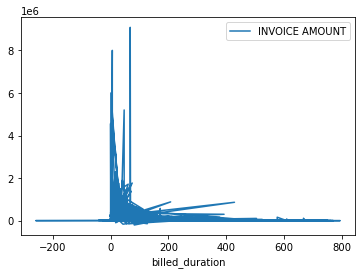

In [44]:
# Plot the amount of an invoice
# by the interval between billing and payment

ckbk.plot(x = "billed_duration", y = "INVOICE AMOUNT")

In [45]:
# compare vendors

per_vendor = ckbk.groupby("NAME1")
cols = ["vendor", "total_ct_invoices", 
        "sum_invoiced", "avg_invoice", "avg_billed_duration"]
pv = pd.DataFrame(columns=cols)
for name, group in per_vendor:
    ct_inv = len(group)
    sum_inv = group["INVOICE AMOUNT"].sum()
    sum_ttp = group["billed_duration"].sum()
    avg_inv = round(sum_inv / ct_inv, 2)
    avg_ttp = round(sum_ttp / ct_inv, 2)
    pv = pv.append(pd.DataFrame([[name, ct_inv, sum_inv, avg_inv, avg_ttp]], 
                                columns=cols))

In [38]:
pv.sort_values(by=["sum_invoiced"], inplace=True, ascending=False)
pv.head()

,vendor,total_ct_invoices,sum_invoiced,avg_invoice,avg_billed_duration
0,PRESBYTERIAN INSURANCE COMPANY INC,127,1.202120e+08,946551.39,19.54
0,BRADBURY STAMM CONSTRUCTION INC,97,3.282649e+07,338417.39,30.96
0,"EXPRESS SCRIPTS, INC",129,2.781798e+07,215643.23,10.38
0,PUBLIC SERVICE COMPANY OF NEW MEXICO,23561,2.450028e+07,1039.87,13.02
0,ALBUQUERQUE BERNALILLO COUNTY,17337,2.010128e+07,1159.44,11.30


In [39]:
pv.sort_values(by=["total_ct_invoices"], inplace=True, ascending=False)
pv.head()

,vendor,total_ct_invoices,sum_invoiced,avg_invoice,avg_billed_duration
0,RIVENROCK STAFFING LLC,30301,15071993.55,497.41,16.71
0,CINTAS CORPORATION NO 2,25847,405539.79,15.69,25.21
0,PUBLIC SERVICE COMPANY OF NEW MEXICO,23561,24500275.87,1039.87,13.02
0,STRIDE INC,23083,1988878.00,86.16,13.24
0,ALBUQUERQUE BERNALILLO COUNTY,17337,20101278.60,1159.44,11.30


In [46]:
ckbk.describe()

,PAYMENT REFERENCE NUMBER,INVOICE AMOUNT,invoice_year,invoice_month,payment_year,payment_month,billed_duration
count,4.560660e+05,4.560660e+05,456066.000000,456066.000000,456066.000000,456066.000000,456066.000000
mean,9.152507e+06,2.494417e+03,2019.978418,6.539678,2020.052723,6.538135,26.262997
std,9.025691e+05,3.873999e+04,0.717031,3.442338,0.709791,3.447475,39.963799
min,2.664738e+06,-2.046121e+05,2019.000000,1.000000,2019.000000,1.000000,-259.000000
25%,9.371866e+06,2.398000e+01,2019.000000,4.000000,2020.000000,3.000000,7.000000
50%,9.392250e+06,1.065950e+02,2020.000000,7.000000,2020.000000,7.000000,15.000000
75%,9.414689e+06,4.611975e+02,2020.000000,10.000000,2021.000000,10.000000,30.000000
max,9.443825e+06,9.081197e+06,2021.000000,12.000000,2021.000000,12.000000,795.000000
